In [20]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sdv.lite import SingleTablePreset
from sdv.metadata import SingleTableMetadata
minmaxscaler = MinMaxScaler()
standardscaler = StandardScaler()
robustscaler = RobustScaler()

df = pd.read_csv('../data/original_data.csv' , sep = "\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [21]:
df.shape

(2240, 29)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [23]:
# Date Parsing
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)

In [24]:
df.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

In [25]:
df.isnull().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

So as we can see, income has missing values. Since they are only 24 out of 2240, I am going to remove these rows as I won't give the income column a value like the median or mean since I assume the income is a really big factor in shopping decisions.

In [26]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.shape

(2216, 29)

There were no duplicates.

Now unto handling outliers.

In [27]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,2013-07-10 11:29:27.509025280,49.012635,305.091606,26.356047,166.995939,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,24.000000,2.000000,16.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,174.500000,8.000000,68.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,2013-12-31 00:00:00,74.000000,505.000000,33.000000,232.250000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,NaN,28.948352,337.327920,39.793917,224.283273,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417


Some columns seem off like Income, Year_Birth, MntMeatProducts and MntWines.

In [28]:
columns_for_outliers = ['Income', 'Year_Birth', 'MntMeatProducts', 'MntWines']
bounds = []
for column in columns_for_outliers:
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  bounds.append((lower_bound, upper_bound))
  print(f'Column: {column}')
  print(f'Lower Bound: {lower_bound}')
  print(f'Upper Bound: {upper_bound}')
  under_lower = (df[column] < lower_bound).sum()
  over_upper = (df[column] > upper_bound).sum()
  print(f'Under Lower Bound: {under_lower}')
  print(f'Over Upper Bound: {over_upper}')
  print('\n')

Column: Income
Lower Bound: -14525.5
Upper Bound: 118350.5
Under Lower Bound: 0
Over Upper Bound: 8


Column: Year_Birth
Lower Bound: 1932.0
Upper Bound: 2004.0
Under Lower Bound: 3
Over Upper Bound: 0


Column: MntMeatProducts
Lower Bound: -308.375
Upper Bound: 556.625
Under Lower Bound: 0
Over Upper Bound: 174


Column: MntWines
Lower Bound: -697.5
Upper Bound: 1226.5
Under Lower Bound: 0
Over Upper Bound: 35




In [29]:
income_outliers = df['Income'][df['Income'] > bounds[0][1]]
income_outliers

164     157243.0
617     162397.0
655     153924.0
687     160803.0
1300    157733.0
1653    157146.0
2132    156924.0
2233    666666.0
Name: Income, dtype: float64

In [30]:
byr_outliers = df['Year_Birth'][df['Year_Birth'] < bounds[1][0]]
byr_outliers

192    1900
239    1893
339    1899
Name: Year_Birth, dtype: int64

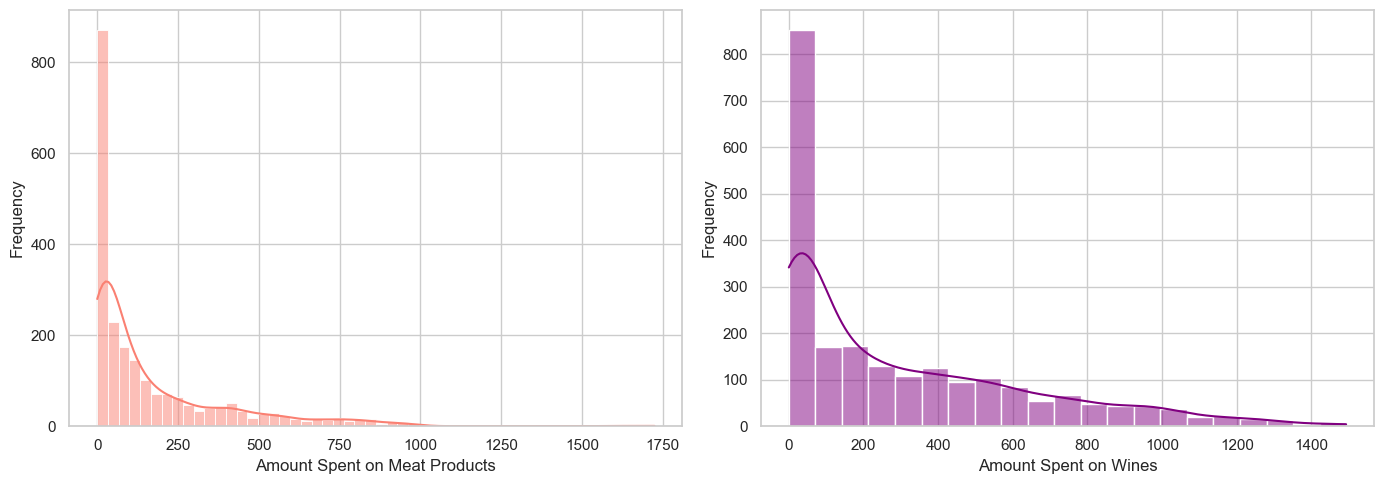

In [31]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df['MntMeatProducts'], kde=True, ax=axes[0], color='salmon')
axes[0].set_xlabel('Amount Spent on Meat Products')
axes[0].set_ylabel('Frequency')

sns.histplot(df['MntWines'], kde=True, ax=axes[1], color='purple')
axes[1].set_xlabel('Amount Spent on Wines')
axes[1].set_ylabel('Frequency')


plt.tight_layout()
plt.show()

For Wines and Mean Product columns, the high number of outliers and the weird distribution (high number of 0s) is actually very understandable, for example some families might follow a vegan or carnivore diet or some families do not drink alcohol. This data is obviously important as it could be used for clustering or other strategies.

For Year_Birth all 3 outliers look abnormal and I will replace them with the mean and not the lower bound, as they look more like a faulty input rather than a representation of an old person.

For Income I am replacing the 666,666 value with the mean and the other outliers with the upper bounds.

In [32]:
for row in income_outliers.index:
  df.at[row, 'Income'] = bounds[0][1]
df.at[2233 , 'Income'] = df['Income'].mean()
for row in byr_outliers.index:
  df.at[row, 'Year_Birth'] = int(df['Year_Birth'].mean())

In [33]:
df['Education'].value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [34]:
df['Marital_Status'].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

I'll replace YOLO, Absurd and Alone with Single.

In [35]:
df['Marital_Status'] = df['Marital_Status'].replace(['YOLO', 'Absurd', 'Alone'], 'Single')
df['Marital_Status'].value_counts()

Marital_Status
Married     857
Together    573
Single      478
Divorced    232
Widow        76
Name: count, dtype: int64

### Data Augmentation

I noticed some kind of data should be added as it is low in the whole set. For example the number of customers who never accepted a campaign are very high. So I will simply augment the data based on the customers that have at least one accepted campaign.

In [36]:
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
df_campaign_responders = df[df[campaign_cols].sum(axis=1) > 0]

metadata = SingleTableMetadata()
metadata.primary_key = 'ID'
for column in df_campaign_responders.columns:
    if column == 'ID':
        metadata.add_column(column, sdtype='id')
    elif column == 'Dt_Customer':
        metadata.add_column(column, sdtype='datetime')
    elif column in ['Education', 'Marital_Status']:
        metadata.add_column(column, sdtype='categorical')
    elif column in campaign_cols + ['Complain', 'Response']:
        metadata.add_column(column, sdtype='categorical')
    elif df_campaign_responders[column].dtype == 'int64':
        metadata.add_column(column, sdtype='numerical', computer_representation='Int64')
    elif df_campaign_responders[column].dtype == 'float64':
        metadata.add_column(column, sdtype='numerical')


synthesizer = SingleTablePreset(name='FAST_ML' , metadata=metadata)
synthesizer.fit(df_campaign_responders)
new_responders = synthesizer.sample(400) # I chose 400 because I need the highest number possible without much disrubting the percentage of customers with no accepted campaigns (78% to 67%) to still make it look like most customers do not accept campaigns.

df = pd.concat([df, new_responders], ignore_index=True)
new_responders

c:\Users\MARC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sdv\lite\single_table.py:52: FutureWarning: The 'SingleTablePreset' is deprecated. For equivalent Fast ML functionality, please use the 'GaussianCopulaSynthesizer'.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
c:\Users\MARC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sdv\lite\single_table.py:61: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(META_DEPRECATION_MSG, FutureWarning)
c:\Users\MARC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sdv\single_table\base.py:126: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
c:\Users\MARC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sdv\single_table\base.py:105: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicabi

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1815690,1985,Graduation,Together,44914.558040,1,1,2013-04-24,51,305,...,9,1,0,0,1,0,0,3,11,0
1,1397758,1958,Graduation,Together,74699.698661,0,1,2013-12-16,23,619,...,5,0,1,1,0,0,0,3,11,0
2,5746491,1962,PhD,Single,71750.523037,0,0,2013-03-04,99,1232,...,5,0,0,0,0,0,0,3,11,0
3,10366921,1968,Graduation,Together,82039.430731,0,1,2013-11-24,56,950,...,2,0,0,1,1,0,0,3,11,0
4,14850936,1992,PhD,Married,25326.253716,1,0,2012-12-16,99,0,...,6,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,9842391,1969,Master,Married,73702.462053,0,0,2013-07-27,33,638,...,1,0,1,0,0,0,0,3,11,0
396,11421940,1965,PhD,Together,47986.499464,0,2,2012-11-08,40,594,...,6,1,0,0,0,0,0,3,11,1
397,8522591,1984,Graduation,Married,69426.873014,0,0,2013-07-13,11,572,...,6,0,0,0,0,0,0,3,11,0
398,9632228,1953,Graduation,Single,55476.666722,1,0,2013-11-14,50,712,...,8,1,0,0,0,0,0,3,11,0


### Feature Engineering

After feature engineering I will keep the original columns intact for EDA along with the transformed data to get as much insights as I can. But when it comes to building my models, I will drop the columns that do not offer anything new.

In [37]:
# I'll calculate age, with the equation 2025 - YearBirth.
df['Age'] = 2025 - df['Year_Birth']

# I'll calculate household size by adding the sum of kids to 1 if the parent is single (single, widowed or divorced) or 2 if it's a couple
df['Household_Size'] = df['Kidhome'] + df['Teenhome'] + df['Marital_Status'].isin(['Married', 'Together']).astype(int) + 1

# Date parsing
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)

# Total spending on all products
df['TotalSpent'] = df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum(axis=1)

# Luxury Score, to assess how much they spend on luxurious items.
df['LuxuryScore'] = df[['MntWines','MntGoldProds']].sum(axis=1) / df['TotalSpent']

# Health Score, to assess how much they spend on healthy items
df['HealthScore'] = df[['MntFruits','MntMeatProducts','MntFishProducts']].sum(axis=1) / df[['MntFruits','MntMeatProducts','MntFishProducts' , 'MntSweetProducts']].sum(axis=1)
df['HealthScore'] = df['HealthScore'] ** 3

# Total nb of purchases
df['TotalPurchases'] = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

# Total nb of acceptance of marketing campaigns
df['TotalCampaignsAccepted'] = df[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']].sum(axis=1)

# I'll add now two columns that quantify the momentum of acceptance of marketing campaigns. One is going to calculate recency in
# accepting these campaigns by giving more weight to recent campaigns and the other is going to use regression to check if there is a
# trend in acceptance, now even though this does not give much information if the score was close to 0 (could be majority 1s or
# majority 0s), it can give us an idea if more people are starting to accept campaigns or the opposite, if they are not intreseted
# in them.
df['CmpAccRecency'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].dot([2**1, 2**2, 2**3, 2**4, 2**5])

def calculate_campaign_momentum(row):
    x = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # Campaign sequence
    y = row[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].values
    model = LinearRegression()
    model.fit(x, y)
    return model.coef_[0]  # The slope

df['CampaignMomentum'] = df.apply(calculate_campaign_momentum, axis=1)

# Feature to see how much they spend per person in the household on average
df['SpendPerCapita'] = df['TotalSpent'] / df['Household_Size']

# Tenure
ref_date = pd.to_datetime('2025-12-31')
df['Tenure'] = (ref_date.year - df['Dt_Customer'].dt.year) * 12 + (ref_date.month - df['Dt_Customer'].dt.month)

# Loyalty Score, this will increase if a customer spends more household member, has shopped longer at the store, has not complained and has recently shopped.
df['LoyaltyScore'] = ((df['SpendPerCapita'] ** 0.25) * (df['Tenure'])) / ((df['Recency'] + 1) * (df['Complain'] + 1))
df['LoyaltyScore'] = np.log1p(df['LoyaltyScore'])
df['LoyaltyScore'] = minmaxscaler.fit_transform(df[['LoyaltyScore']])

# Web purchases per visit
df['WebPurchasesPerVisit'] = df['NumWebPurchases'] / (df['NumWebVisitsMonth'] + 1)

# Online purhases percentage to all purchases
df['OnlinePurchases'] = (df['NumWebPurchases'] + df['NumCatalogPurchases']) / (df['TotalPurchases'] + 1)

# Impulse Buyer, meaning that the customer buys because of emotion and fear of missing out. This will have as input how much he
# spends on sweets, if he accepts campaigns and has a high Web purchases/visit as a web page is very flashy and attracts more
df['Sweet_Z'] = np.log1p(df['MntSweetProducts'])
df['Deals_Z'] = np.log1p(df['NumDealsPurchases'])
df['WebRatio_Z'] = np.log1p(df['WebPurchasesPerVisit'])
features_for_impulse = df[['Sweet_Z', 'Deals_Z', 'WebRatio_Z']]
scaled = robustscaler.fit_transform(features_for_impulse)
df[['Sweet_Z', 'Deals_Z', 'WebRatio_Z']] = scaled
df['ImpulseIndex'] = df['Sweet_Z'] + df['Deals_Z'] + df['WebRatio_Z'] + df['TotalCampaignsAccepted'] * 1.2
df.drop(columns=['Sweet_Z', 'Deals_Z', 'WebRatio_Z'], inplace=True)
df['ImpulseIndex'] = (df['ImpulseIndex'] - df['ImpulseIndex'].min()) / (df['ImpulseIndex'].max() - df['ImpulseIndex'].min())



In [38]:
df.to_csv('../data/transformed_data.csv', index=False)